___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://dezyre.gumlet.io/images/Types+of+Regression+Analysis+in+Machine+Learning/Regression+Analysis.png?w=330&dpr=2.6" width="350px" height="180px" />


# <font color= #8A0829> Proyecto Taller de Modelado de Datos </font>
- <Strong> MARIA PAULA PEREZ ROMO</Strong>
- <Strong> </Strong> 2023
- <Strong> Email: </Strong>  <font color="blue"> PAULA.PEREZ@ITESO.MX </font>
___

<p style="text-align:left;"> Imagen recuperada de: https://dezyre.gumlet.io/images/Types+of+Regression+Analysis+in+Machine+Learning/Regression+Analysis.png?w=330&dpr=2.6</p>



 # <font color='red'>Regression</font>

### General Characteristics:

The Octoparse extraction tool was used to extract data from the website. The data was collected in two parts: one for economy class tickets and the other for business class tickets. A total of 300,261 different flight booking options were extracted from the site. The data was collected over 50 days, from February 11th to March 31st, 2022. The data source was secondary and was collected from the Ease my trip website, for air travel between the 6 major metropolitan cities of India.

This dataset has 10 columns and was retrieved from the Kaggle platform. The link is as follows: [Flight Price Prediction Competition Format](https://www.kaggle.com/datasets/kukuroo3/flight-price-predict-competition-format/data)

This dataset contains information about flights and various features related to them. These features could include details about airlines, origin and destination cities, number of stops, departure and arrival times, flight duration, travel dates, and flight prices.

### Meaning of Variables:

1. **`airline`**: The name of the airline company.

2. **`flight`**: Stores information about the flight code of the aircraft.

3. **`source_city`**: The city from which the flight takes off.

4. **`departure_time`**: Created by grouping time periods into categories. Stores information about the departure time and has 6 unique time labels.

5. **`stops`**: With 3 different values, it stores the number of stops between the origin and destination cities.

6. **`arrival_time`**: Created by grouping time intervals into categories. It has six distinct time labels and contains information about the arrival time.

7. **`destination_city`**: The city where the flight will land. It is a categorical feature with 6 unique cities.

8. **`duration`**: Shows the total amount of time needed to travel between cities in hours.

9. **`days_left`**: Calculated by subtracting the travel date from the booking date.

10. **`price`**: Stores information about the ticket price.

11. **`flightId`**: is the flight ID.

## 1. Problem Definition:

**Analysis of Factors Affecting Flight Prices:**

Given information about the airline, origin, destination, schedule, and other relevant characteristics, can the price of a flight be accurately predicted? For airlines, understanding how different features affect prices can assist in pricing strategies and sales optimization.

• Objective: To predict and analyze the most influential factors affecting flight prices, based on various characteristics such as airline, flight duration, class, departure date, etc., and anomalies may be considered.

• Problem Type: Exploratory analysis and regression.

• Variables of Interest:
Predictive Variable: Price - This is the target variable for regression.
Predictor Variables: These can include a variety of features such as Airline, Source, Destination, Stops, Departure_Time, Arrival_Time, Duration, and other relevant flight characteristics.

## 2. Data preprocessing:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
train_data = pd.merge(X_train, y_train, on='filghtId')
test_data = pd.merge(X_test, y_test, on='filghtId')

In [4]:
combined_data = pd.concat([train_data, test_data], ignore_index=True)

combined_data

,filghtId,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,252589,Vistara,UK-808,Bangalore,Early_Morning,one,Night,Mumbai,13.25,46,69244
1,223754,Vistara,UK-927,Delhi,Morning,one,Evening,Chennai,10.42,31,52392
2,243398,Vistara,UK-988,Mumbai,Night,one,Morning,Chennai,13.00,28,61933
3,208360,Vistara,UK-815,Delhi,Morning,one,Night,Mumbai,12.67,17,53164
4,247226,Vistara,UK-854,Bangalore,Evening,one,Morning,Delhi,13.67,32,42521
...,...,...,...,...,...,...,...,...,...,...,...
9040,292592,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,17.17,36,61649
9041,212549,Vistara,UK-975,Delhi,Early_Morning,one,Night,Bangalore,15.17,9,54777
9042,209507,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,13.83,27,59033
9043,260162,Vistara,UK-802,Bangalore,Evening,one,Morning,Chennai,15.08,28,60396


Take a look at the type of data we have and the nulls

In [5]:
total_data = [combined_data]

for df in total_data:
    print("INFO:")
    print(df.info())
    print("")
    print("NULOS %")
    print(df.isnull().sum()/len(df))
    print("")

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9045 entries, 0 to 9044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   filghtId          9045 non-null   int64  
 1   airline           9045 non-null   object 
 2   flight            9045 non-null   object 
 3   source_city       9045 non-null   object 
 4   departure_time    9045 non-null   object 
 5   stops             9045 non-null   object 
 6   arrival_time      9045 non-null   object 
 7   destination_city  9045 non-null   object 
 8   duration          9045 non-null   float64
 9   days_left         9045 non-null   int64  
 10  price             9045 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 777.4+ KB
None

NULOS %
filghtId            0.0
airline             0.0
flight              0.0
source_city         0.0
departure_time      0.0
stops               0.0
arrival_time        0.0
destination_city    0.0
durati

In [8]:
columnas = train_data.columns
categoricos = []

for columna in columnas:
    print("Column:",columna)
    if len(train_data[columna].unique())<10:
        print(train_data[columna].unique())
        print("")
        categoricos.append(columna)

    else:
        print("the column has more than 10 values, it´s not categorical")
        print("Dtype:",train_data[columna].dtype)
        print("")

Column: filghtId
the column has more than 10 values, it´s not categorical
Dtype: int64

Column: airline
['Vistara' 'Air_India' 'SpiceJet' 'GO_FIRST' 'AirAsia' 'Indigo']

Column: flight
the column has more than 10 values, it´s not categorical
Dtype: object

Column: source_city
['Bangalore' 'Delhi' 'Mumbai' 'Chennai' 'Kolkata' 'Hyderabad']

Column: departure_time
['Early_Morning' 'Morning' 'Night' 'Evening' 'Afternoon' 'Late_Night']

Column: stops
['one' 'zero' 'two_or_more']

Column: arrival_time
['Night' 'Evening' 'Morning' 'Early_Morning' 'Afternoon' 'Late_Night']

Column: destination_city
['Mumbai' 'Chennai' 'Delhi' 'Bangalore' 'Kolkata' 'Hyderabad']

Column: duration
the column has more than 10 values, it´s not categorical
Dtype: float64

Column: days_left
the column has more than 10 values, it´s not categorical
Dtype: int64

Column: price
the column has more than 10 values, it´s not categorical
Dtype: int64



In [9]:
for categoria in categoricos:
    train_data[categoria] = train_data[categoria].astype('category')

In [10]:
numericas = ['days_left','price','duration']
for numerica in numericas:
    print(numerica)
    print("Max:",train_data[numerica].max())
    print("Min:",train_data[numerica].min())
    print("Distance:",train_data[numerica].max()-train_data[numerica].min())
    print("")

days_left
Max: 49
Min: 1
Distance: 48

price
Max: 117307
Min: 2339
Distance: 114968

duration
Max: 45.83
Min: 1.25
Distance: 44.58



In [11]:
train_data.flight.value_counts()

UK-836     84
UK-772     80
UK-706     80
UK-874     79
UK-878     74
           ..
G8-382      1
UK-621      1
I5-1621     1
I5-798      1
AI-695      1
Name: flight, Length: 283, dtype: int64

In [12]:
combined_data['flight'] = combined_data['flight'].astype('category')

In [13]:
combined_data['flight'] = combined_data['flight'].astype('category')
combined_data['airline'] = combined_data['airline'].astype('category')
combined_data['source_city'] = combined_data['source_city'].astype('category')
combined_data['departure_time'] = combined_data['departure_time'].astype('category')
combined_data['stops'] = combined_data['stops'].astype('category')
combined_data['arrival_time'] = combined_data['arrival_time'].astype('category')
combined_data['destination_city'] = combined_data['destination_city'].astype('category')


In [14]:
total_data = [combined_data]

for df in total_data:
    print("INFO:")
    print(df.info())
    print("")

INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9045 entries, 0 to 9044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   filghtId          9045 non-null   int64   
 1   airline           9045 non-null   category
 2   flight            9045 non-null   category
 3   source_city       9045 non-null   category
 4   departure_time    9045 non-null   category
 5   stops             9045 non-null   category
 6   arrival_time      9045 non-null   category
 7   destination_city  9045 non-null   category
 8   duration          9045 non-null   float64 
 9   days_left         9045 non-null   int64   
 10  price             9045 non-null   int64   
dtypes: category(7), float64(1), int64(3)
memory usage: 365.1 KB
None



<AxesSubplot:xlabel='airline', ylabel='count'>

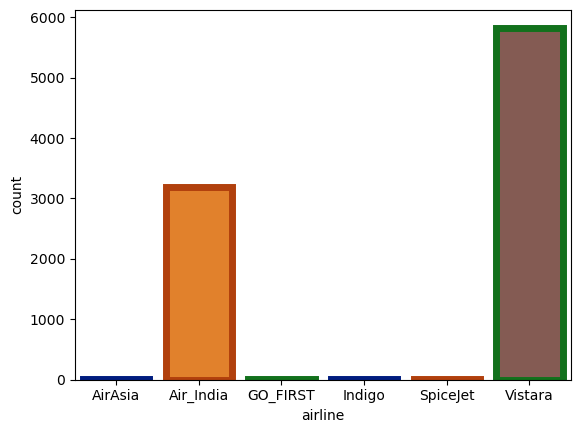

In [15]:
#Graph where the number of flights per airline is visible 
sns.countplot(x='airline',data=df,linewidth=5,edgecolor=sns.color_palette("dark", 3))

There are two airlines that are dominant, Air_india y Vistara

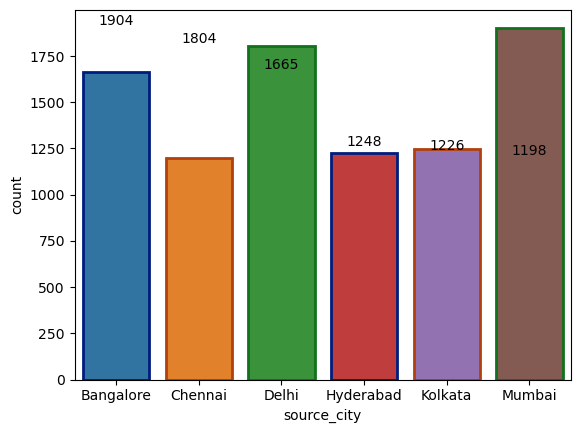

In [16]:
#Graph where the source city is visible
sns.countplot(x='source_city', data=df, linewidth=2, edgecolor=sns.color_palette("dark", 3))
total_counts = df['source_city'].value_counts()
for i, count in enumerate(total_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

This grpah is balanced, but the cities with more flights are Mumbai y Delhi

<AxesSubplot:xlabel='departure_time', ylabel='count'>

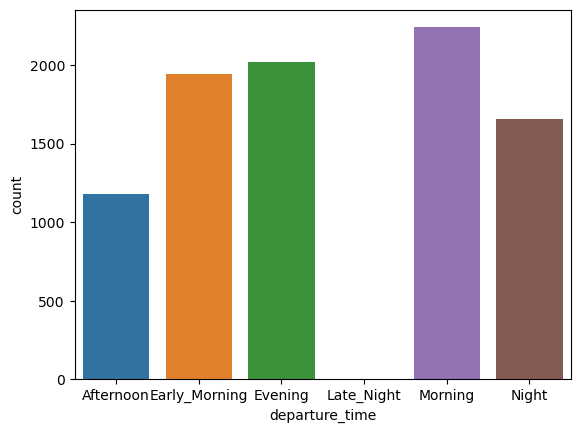

In [17]:
# Departure times of the flights

sns.countplot(x="departure_time", data= df)


It is evident that flights departing in the morning and afternoon are predominant, with some in the evening as well. However, it is also notable that there are virtually no flights departing very late at night.

<AxesSubplot:xlabel='stops', ylabel='count'>

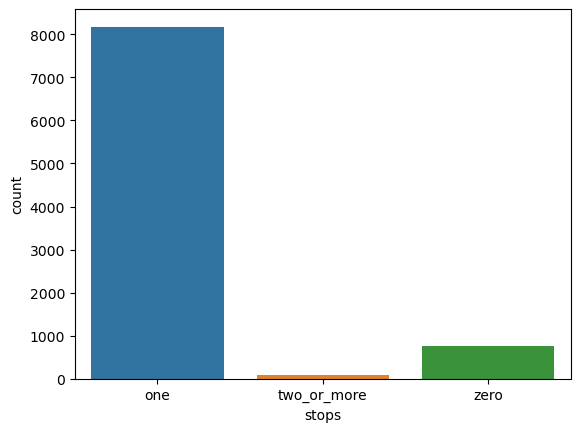

In [18]:
#number of stops (distribution)
sns.countplot(x="stops", data= df)

The majority of flights make a single stop, with few having none. Similarly, it is very rare to find an aircraft with two stops or more.

<AxesSubplot:xlabel='arrival_time', ylabel='count'>

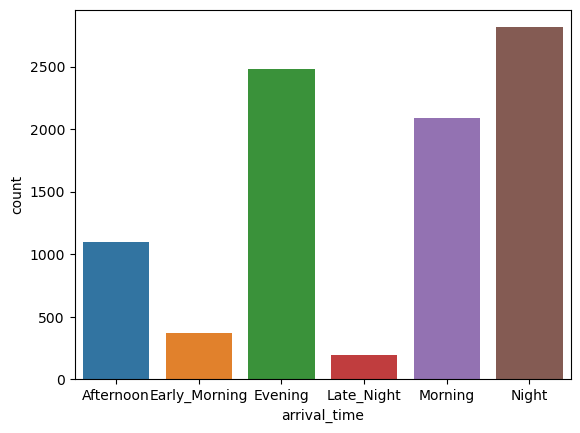

In [19]:
#arrival times
sns.countplot(x="arrival_time", data= df)

The arrival times are widely distributed, although the departure times show some repetition, as there are few flights very late at night.

<AxesSubplot:xlabel='destination_city', ylabel='count'>

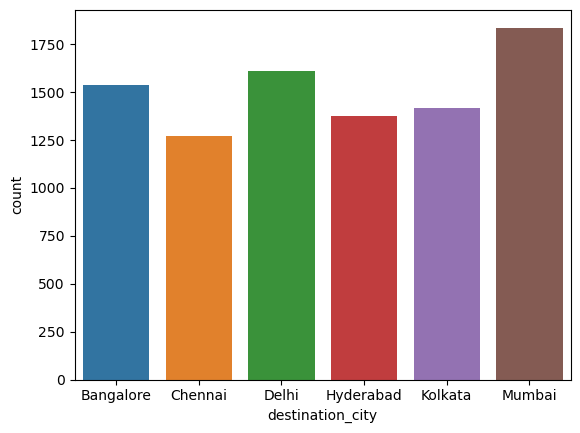

In [20]:
# destination of flight
sns.countplot(x="destination_city",data=df)

Las ciudades de destino estan más equilibradas, pero al igual que las salidas Mumbai y Delhi reciben más vuelos.

C:\Users\mpper\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

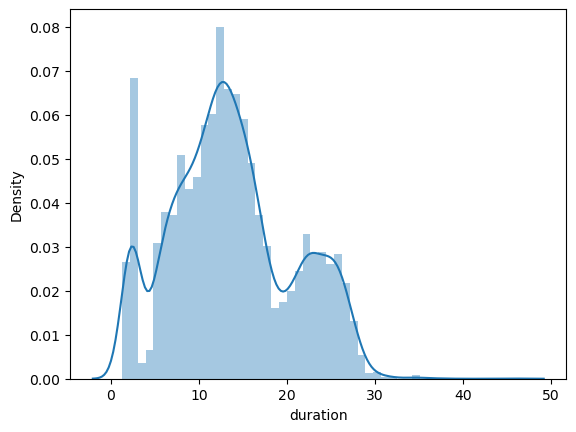

In [21]:
# duration of flight
sns.distplot(df['duration'])

It can be seen that the flight durations are widely distributed, with both very long flights of 30 hours (which are very few), and flights of approximately 1 hour (which are many). The most common flights are those lasting between 8 and 17 hours.

C:\Users\mpper\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='days_left', ylabel='Density'>

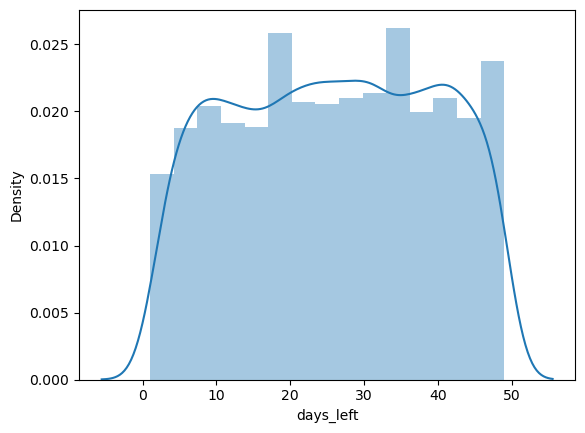

In [22]:
# difference between day of flight and when the ticket was bought
sns.distplot(df['days_left'], bins = 15)

With this distribution, it can be seen that tickets are usually purchased between 1 day and 49 days in advance. There are many tickets purchased with little advance notice, and many more purchased with 19 days or 49 days of advance notice.

In [23]:
df["price"].dtypes

dtype('int64')

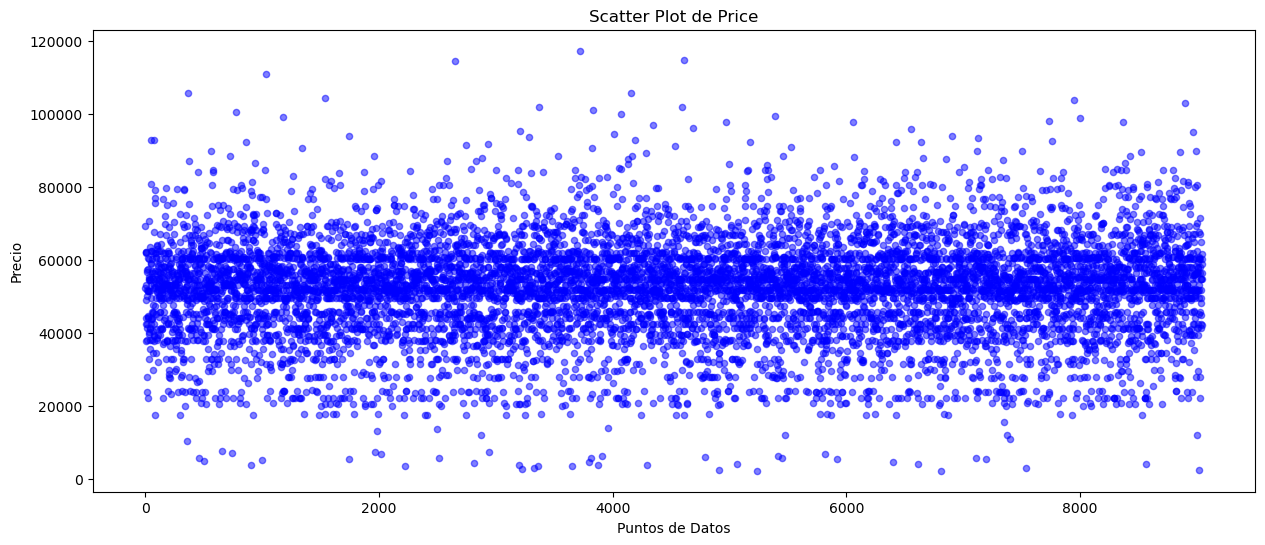

In [24]:
plt.figure(figsize=(15, 6))  
plt.scatter(df.index, df['price'], s=20, c='blue', marker='o', alpha=0.5)


plt.xlabel("Puntos de Datos")
plt.ylabel("Precio")
plt.title("Scatter Plot de Price")

plt.show()

C:\Users\mpper\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

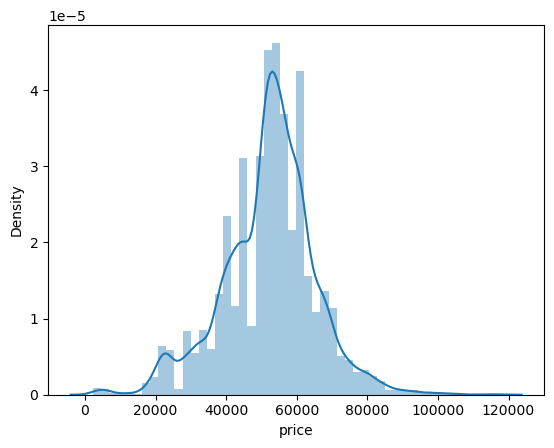

In [25]:
sns.distplot(df['price'])

This distribution seems to be normal, meaning that the prices are always within a price range.

# Regression:

3. Regression Model Processing: Apply at least 4 regression models to estimate the mapping of the data. The main intention is to compare the performance of each model, including mentioning the complexity (number of parameters and execution time). Add a hyperparameter tuning method to improve the model's performance. Create a "new" dataset where the target variable is predicted for those new data points.

In [26]:
import pandas as pd
import numpy as np
import xgboost as xgb
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import sklearn.metrics as metrics
from sklearn.metrics import make_scorer, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor 

from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

Delete de Id because it´s not usefull for predictions

In [27]:
combined_data.drop(columns = ['filghtId'], inplace=True)

In [29]:
#Categorical variables 
catcol = combined_data.select_dtypes(include='category').columns

#numerical variables
numcol = combined_data.select_dtypes(exclude='category').columns

print("categorical variables: ", catcol.values ,"\n")
print("numerical variables: ", numcol.values)
print("")

for column in catcol:
    print(len(combined_data[column].unique()),column)

categorical variables:  ['airline' 'flight' 'source_city' 'departure_time' 'stops' 'arrival_time'
 'destination_city'] 

numerical variables:  ['duration' 'days_left' 'price']

6 airline
296 flight
6 source_city
6 departure_time
3 stops
6 arrival_time
6 destination_city


Drop the 'flight' column as we will only use variables with less than 10 unique values.

In [30]:
combined_data.drop(columns = ['flight'], inplace=True)

In [31]:
#unique values
catcol = combined_data.select_dtypes(include='category').columns
for column in catcol:
    print(len(combined_data[column].unique()),column)
    print("unique values: ", combined_data[column].unique())

6 airline
unique values:  ['Vistara', 'Air_India', 'SpiceJet', 'GO_FIRST', 'AirAsia', 'Indigo']
Categories (6, object): ['AirAsia', 'Air_India', 'GO_FIRST', 'Indigo', 'SpiceJet', 'Vistara']
6 source_city
unique values:  ['Bangalore', 'Delhi', 'Mumbai', 'Chennai', 'Kolkata', 'Hyderabad']
Categories (6, object): ['Bangalore', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai']
6 departure_time
unique values:  ['Early_Morning', 'Morning', 'Night', 'Evening', 'Afternoon', 'Late_Night']
Categories (6, object): ['Afternoon', 'Early_Morning', 'Evening', 'Late_Night', 'Morning', 'Night']
3 stops
unique values:  ['one', 'zero', 'two_or_more']
Categories (3, object): ['one', 'two_or_more', 'zero']
6 arrival_time
unique values:  ['Night', 'Evening', 'Morning', 'Early_Morning', 'Afternoon', 'Late_Night']
Categories (6, object): ['Afternoon', 'Early_Morning', 'Evening', 'Late_Night', 'Morning', 'Night']
6 destination_city
unique values:  ['Mumbai', 'Chennai', 'Delhi', 'Bangalore', 'Kolkata', 'Hyd

In [32]:
#dummies
dummies_columns = ['airline','source_city','destination_city']

for column in dummies_columns:
    print("dummies to the column", column)
    combined_data = pd.get_dummies(combined_data, columns=[column], prefix=column)
    
combined_data

dummies to the column airline
dummies to the column source_city
dummies to the column destination_city


,departure_time,stops,arrival_time,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,Early_Morning,one,Night,13.25,46,69244,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Morning,one,Evening,10.42,31,52392,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,Night,one,Morning,13.00,28,61933,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,Morning,one,Night,12.67,17,53164,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,Evening,one,Morning,13.67,32,42521,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,Evening,one,Morning,17.17,36,61649,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9041,Early_Morning,one,Night,15.17,9,54777,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9042,Early_Morning,one,Night,13.83,27,59033,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9043,Evening,one,Morning,15.08,28,60396,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
ordenal_columns = ['departure_time','arrival_time',]
#mapping to these variables
ordinal_mapping = {'Early_Morning': 1, 'Morning': 2, 'Night': 3, 'Evening':4, 'Afternoon':5, 'Late_Night':6}

for column in ordenal_columns:
    combined_data[column] = combined_data[column].map(ordinal_mapping).astype(int)
    
ordinal_mapping = {'one':1,'zero':2,'two_or_more':3}
combined_data['stops'] = combined_data['stops'].map(ordinal_mapping).astype(int)


In [34]:
combined_data

,departure_time,stops,arrival_time,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,...,source_city_Delhi,source_city_Hyderabad,source_city_Kolkata,source_city_Mumbai,destination_city_Bangalore,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai
0,1,1,3,13.25,46,69244,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,4,10.42,31,52392,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
2,3,1,2,13.00,28,61933,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3,2,1,3,12.67,17,53164,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,4,1,2,13.67,32,42521,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9040,4,1,2,17.17,36,61649,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
9041,1,1,3,15.17,9,54777,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
9042,1,1,3,13.83,27,59033,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
9043,4,1,2,15.08,28,60396,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [35]:
# We apply a logarithm to the 'price' to standardize it
y = np.log(combined_data['price'])
y
# This means that we will need to take the exponential of the final result to obtain the actual price

0       11.145392
1       10.866509
2       11.033808
3       10.881137
4       10.657753
          ...    
9040    11.029212
9041    10.911026
9042    10.985852
9043    11.008678
9044    10.943552
Name: price, Length: 9045, dtype: float64

In [36]:
X = combined_data.drop("price", axis = 1).values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-1.34062696, -0.31223512, -0.23895298, ..., -0.42340274,
        -0.43064157,  1.98085557],
       [-0.5992041 , -0.31223512,  0.64538815, ..., -0.42340274,
        -0.43064157, -0.50483236],
       [ 0.14221876, -0.31223512, -1.12329411, ..., -0.42340274,
        -0.43064157, -0.50483236],
       ...,
       [-1.34062696, -0.31223512, -0.23895298, ..., -0.42340274,
        -0.43064157,  1.98085557],
       [ 0.88364162, -0.31223512, -1.12329411, ..., -0.42340274,
        -0.43064157, -0.50483236],
       [-1.34062696, -0.31223512, -0.23895298, ...,  2.36181748,
        -0.43064157, -0.50483236]])

# Starting with the models

# XGboost

In [37]:
#Dividing in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                               test_size = 0.2, 
                                               random_state=42)

In [38]:

modelo = xgb.XGBRegressor(objective='reg:squarederror', seed=42)

#Training of model
modelo.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [39]:
#predictions
y_hat= modelo.predict(X_test)

#performance
r2 = metrics.r2_score(y_test,y_hat)
mse = metrics.mean_squared_error(y_test,y_hat)
print('R2:',r2)
print("MSE:",mse)

R2: 0.6602503545823282
MSE: 0.03102623630318583


We get a r2 de 66% and a low mean squared erros 

In [40]:
# We apply GridSearch to improve the model's performance
xgb_model = xgb.XGBRegressor()

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

kf = KFold(n_splits=5, shuffle=True, random_state=17)

r2_scorer = make_scorer(r2_score) 
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring=r2_scorer, cv=kf)

grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)

print("Best score (R^2):", grid_search.best_score_)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Best score (R^2): 0.7088482205880433


We managed to improve the model's performance to 70% with the previous parameters.

In [42]:
# Input data for prediction
# departure time 2 (morning), stops 2, arrival time 4 (evening), duration 14.2, daysleft 32, airline Air_India, 
# source_city Bangalore, destination_city Delhi
nuevos_datos = np.array([[2, 2, 4, 14.2, 32, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

# Carga el mejor modelo obtenido del Grid Search
mejor_modelo = grid_search.best_estimator_

prediccion = mejor_modelo.predict(nuevos_datos)

print("Predicción del precio del boleto de avión:", prediccion)

Predicción del precio del boleto de avión: [8.788811]


In [43]:
# Apply np.exp to the result
prediccion_en_escala_original = np.exp(prediccion)

print("Predicted flight ticket price (in original scale).:", prediccion_en_escala_original)


Predicted flight ticket price (in original scale).: [6560.4253]


# Random Forest

--- 1.7213423252105713 seconds ---
R2 = 0.7632


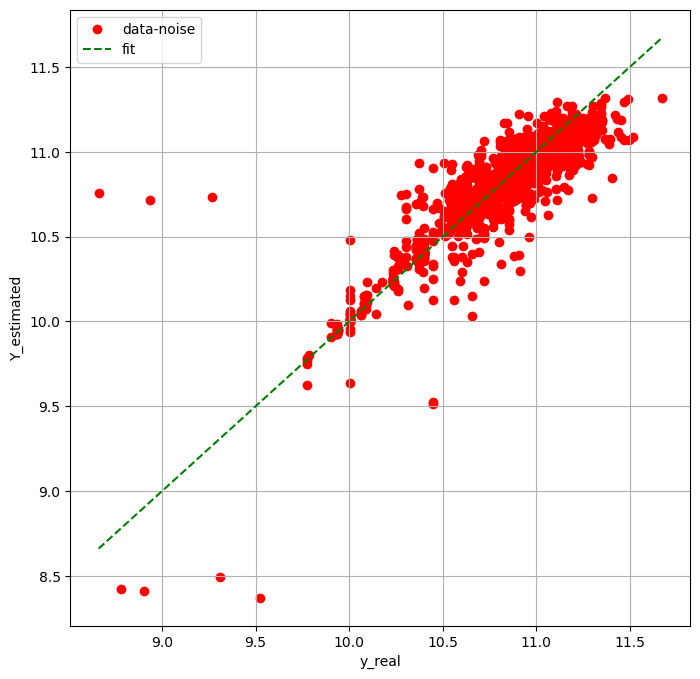

In [44]:
# Build and train the tree

# Build the model
# Result depends a lot on the n_estimators
model = RandomForestRegressor(n_estimators=100,  # Number of trees
                               criterion='squared_error',
                               max_depth=None,  # If left as None, the tree can go to its maximum depth -> may overfit
                               min_samples_split=2,  # How many data points are needed to make a split
                               min_samples_leaf=2,  # How many data points are left in the last leaf
                               bootstrap=True,  # Whether to use bootstrapping
                               oob_score=False,
                               random_state=0,  # Seed
                               verbose=0)  # Do not print things

# Calculate how long it takes
start_time = time.time()

# Train the model
model = model.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))

# Predict
Yhat = model.predict(X_test)
print('R2 = %0.4f' % model.score(X_test, y_test))

plt.figure(figsize=(8, 8))
plt.scatter(y_test, Yhat, c='r', label='data-noise')
plt.plot(np.linspace(min(y_test), max(y_test), 100), np.linspace(min(y_test), max(y_test), 100), 'g--', label='fit')
plt.xlabel('y_real')
plt.ylabel('Y_estimated')
plt.grid()
plt.legend()
plt.show()

We obtained an R2 of 76, but we will apply grid search and k-folds to prevent overfitting and, if possible, improve the model.

In [45]:
# How to determine the optimal number of trees?
# Using cross-validation and grid search
from sklearn.model_selection import GridSearchCV

model2 = RandomForestRegressor(criterion='squared_error',
                               min_samples_leaf=2,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

gs = GridSearchCV(model2,
                  param_grid={'max_depth': range(0, 11),
                              'min_samples_split': range(0, 10),
                              'n_estimators': range(1, 100, 10)},  # Number of trees in the forest
                  cv=2,
                  scoring='neg_mean_squared_error')
# Try broader values when doing the project
# Training
gs.fit(X_train, y_train)

print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\mpper\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
600 fits failed out of a total of 2200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
220 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mpper\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mpper\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\mpper\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\mpper\anaconda3\lib\site-package

--- 339.61893606185913 seconds ---


In [46]:
#Printing best parameters
print(gs.best_params_)

{'max_depth': 10, 'min_samples_split': 9, 'n_estimators': 91}


In [47]:
#model with best parameters
new_model2 = RandomForestRegressor(n_estimators=91,
                               criterion='squared_error',
                               max_depth=10,
                               min_samples_split=9,
                               min_samples_leaf=1,
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)

new_model2.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=9, n_estimators=91,
                      random_state=0)

In [48]:
from sklearn.metrics import r2_score
yhat = new_model2.predict(X_test)
R2_score = r2_score(y_test,yhat)
print('R2:', R2_score) 

R2: 0.694998502934203


We obtained a metric of 69% with grid search and k-folds.

In [49]:
# Input data for prediction
# departure time 2 (morning), stops 2, arrival time 4 (evening), duration 14.2, daysleft 32, airline Air_India, 
# source_city Bangalore, destination_city Delhi
new_data = np.array([[2, 2, 4, 14.2, 32, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

# Make the prediction
predicted_log_price = new_model2.predict(new_data)

# Apply np.exp to undo the logarithmic transformation
predicted_price = np.exp(predicted_log_price)

print("Predicted flight ticket price:", predicted_price)

Predicted flight ticket price: [47514.61449899]


# Árbol de desición

In [50]:

model = DecisionTreeRegressor(random_state = 0)
#training model
model.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [51]:
y_pred = model.predict(X_test)

In [52]:
# mean squared error 
mse = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("\nMSE: ", mse)


MSE:  0.048


In [53]:
# r2
r2 = r2_score(y_test, y_pred)
print("\nR2: ", r2)


R2:  0.4691346729678064


The R2 scores are very low, so we will try to improve them.

[Text(0.20842242978447847, 0.9838709677419355, 'X[3] <= -1.335\nsquared_error = 0.104\nsamples = 7236\nvalue = 10.822'),
 Text(0.025150086904086266, 0.9516129032258065, 'X[8] <= 19.394\nsquared_error = 0.086\nsamples = 639\nvalue = 10.203'),
 Text(0.018065664667631213, 0.9193548387096774, 'X[3] <= -1.701\nsquared_error = 0.07\nsamples = 637\nvalue = 10.21'),
 Text(0.0046641940176815715, 0.8870967741935484, 'X[3] <= -1.749\nsquared_error = 0.031\nsamples = 107\nvalue = 9.926'),
 Text(0.0019823823759811993, 0.8548387096774194, 'X[3] <= -1.798\nsquared_error = 0.025\nsamples = 44\nvalue = 9.798'),
 Text(0.001023165097280619, 0.8225806451612904, 'X[11] <= 0.815\nsquared_error = 0.033\nsamples = 6\nvalue = 9.523'),
 Text(0.0007673738229604642, 0.7903225806451613, 'X[2] <= 0.645\nsquared_error = 0.031\nsamples = 3\nvalue = 9.653'),
 Text(0.0005115825486403095, 0.7580645161290323, 'X[16] <= 0.71\nsquared_error = 0.0\nsamples = 2\nvalue = 9.778'),
 Text(0.00025579127432015476, 0.72580645161290

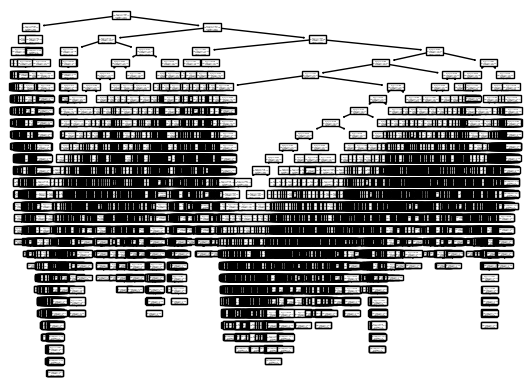

In [54]:
#view tree
from sklearn import tree
tree.plot_tree(model) 

In [58]:
param_grid = {
    'max_depth': range(1,80,10),
    'min_samples_split': [4, 8, 10],
    'min_samples_leaf': [2, 3, 4]}

# Start model
model_tree = DecisionTreeRegressor(random_state=0)

grid_search = GridSearchCV(model_tree, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

best_params_tree = grid_search.best_params_

best_model_tree = DecisionTreeRegressor(random_state=0, **best_params_tree)

best_model_tree.fit(X_train, y_train)

y_pred = best_model_tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- %s seconds ---" % (time.time() - start_time))
print(f"\nMSE: {mse:.3f}")
print(f"R2: {r2:.3f}")


--- 1149.7265956401825 seconds ---

MSE: 0.029
R2: 0.681


Increased from 46% to 68%

In [61]:

new_data_tree = np.array([[2, 2, 4, 14.2, 32, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])

predicted_price_tree = best_model_tree.predict(new_data_tree)

predicted_price_tree_exp = np.exp(predicted_price_tree)

print(f"Predicted flight ticket price: {predicted_price_tree_exp[0]:f}")


Predicted flight ticket price: 57429.809168


# Red Neuronal

In [62]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping

In [67]:
X.shape[1]

23

In [63]:
model = Sequential()

# Layers
model.add(Dense(5, activation='relu', input_dim=23, name='input_layer'))
# Linear output
model.add(Dense(1, activation='linear', name='output_layer'))

learning_rate = 0.01
epochs = 200
momentum = 0.9

sgd = SGD(learning_rate=learning_rate, momentum=momentum)

model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['mse'])

# Callback to stop training if the loss on the validation set stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=100, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/200
73/73 [==============================] - 1s 3ms/step - loss: 10.0830 - mse: 10.0830 - val_loss: 0.1305 - val_mse: 0.1305
Epoch 2/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1116 - mse: 0.1116 - val_loss: 0.0950 - val_mse: 0.0950
Epoch 3/200
73/73 [==============================] - 0s 3ms/step - loss: 0.1087 - mse: 0.1087 - val_loss: 0.0934 - val_mse: 0.0934
Epoch 4/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1062 - mse: 0.1062 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 5/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1060 - mse: 0.1060 - val_loss: 0.1005 - val_mse: 0.1005
Epoch 6/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117 - val_loss: 0.0907 - val_mse: 0.0907
Epoch 7/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1076 - mse: 0.1076 - val_loss: 0.1403 - val_mse: 0.1403
Epoch 8/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1126 -

73/73 [==============================] - 0s 2ms/step - loss: 0.0726 - mse: 0.0726 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 64/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0719 - mse: 0.0719 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 65/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0712 - mse: 0.0712 - val_loss: 0.0614 - val_mse: 0.0614
Epoch 66/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0726 - mse: 0.0726 - val_loss: 0.0575 - val_mse: 0.0575
Epoch 67/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0726 - mse: 0.0726 - val_loss: 0.0605 - val_mse: 0.0605
Epoch 68/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0710 - mse: 0.0710 - val_loss: 0.0566 - val_mse: 0.0566
Epoch 69/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0724 - mse: 0.0724 - val_loss: 0.0576 - val_mse: 0.0576
Epoch 70/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0724 - mse: 0

Epoch 125/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0664 - mse: 0.0664 - val_loss: 0.0538 - val_mse: 0.0538
Epoch 126/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0670 - mse: 0.0670 - val_loss: 0.0523 - val_mse: 0.0523
Epoch 127/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0664 - mse: 0.0664 - val_loss: 0.0522 - val_mse: 0.0522
Epoch 128/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0663 - mse: 0.0663 - val_loss: 0.0549 - val_mse: 0.0549
Epoch 129/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0665 - mse: 0.0665 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 130/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0660 - mse: 0.0660 - val_loss: 0.0525 - val_mse: 0.0525
Epoch 131/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0666 - mse: 0.0666 - val_loss: 0.0530 - val_mse: 0.0530
Epoch 132/200
73/73 [==============================] - 0s 2ms/step - 

73/73 [==============================] - 0s 2ms/step - loss: 0.0643 - mse: 0.0643 - val_loss: 0.0512 - val_mse: 0.0512
Epoch 187/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0645 - mse: 0.0645 - val_loss: 0.0513 - val_mse: 0.0513
Epoch 188/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0638 - mse: 0.0638 - val_loss: 0.0508 - val_mse: 0.0508
Epoch 189/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0639 - mse: 0.0639 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 190/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0638 - mse: 0.0638 - val_loss: 0.0507 - val_mse: 0.0507
Epoch 191/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0513 - val_mse: 0.0513


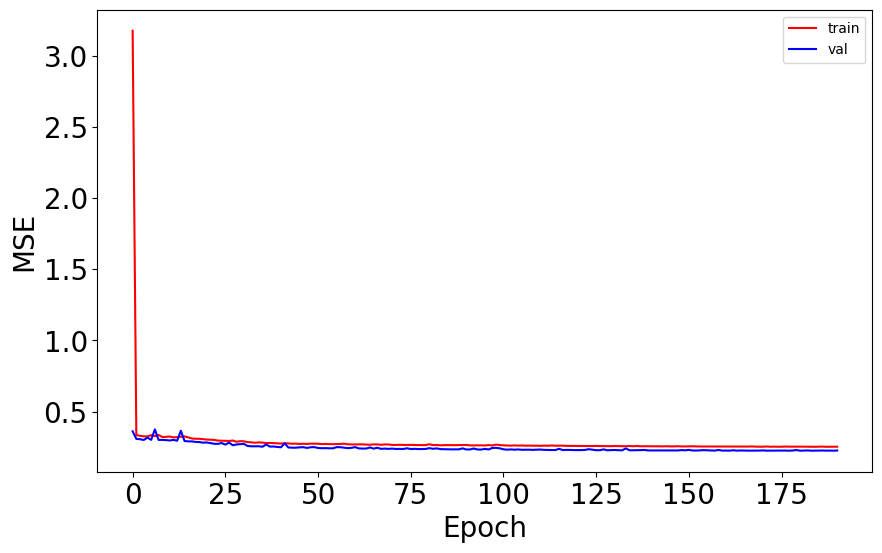

In [64]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [65]:
#Evaluate the model

score = model.evaluate(X_test,y_test)
print('Test mse:', score[1])


57/57 [==============================] - 0s 1ms/step - loss: 0.0506 - mse: 0.0506
Test mse: 0.05060437321662903


57/57 [==============================] - 0s 1ms/step


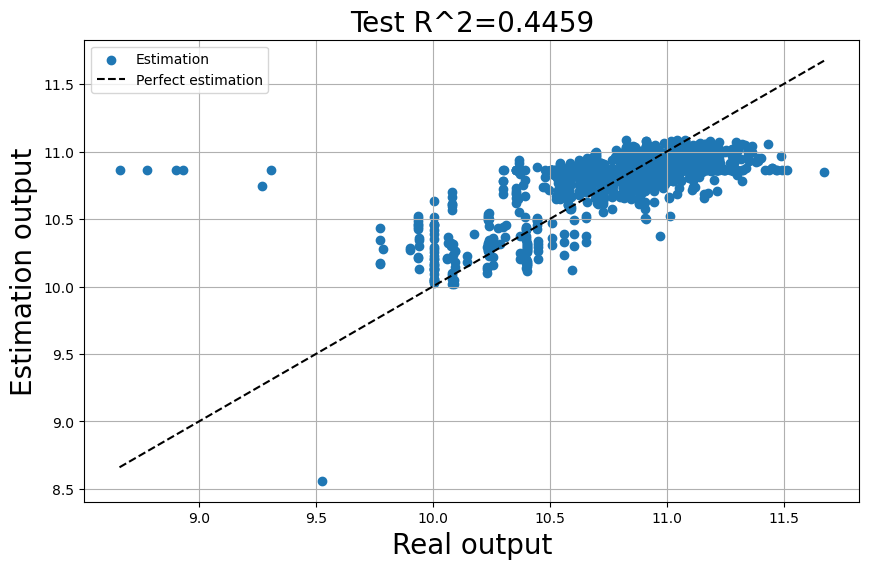

In [66]:

yhat = model.predict(X_test)
R2_score = r2_score(y_test,yhat)
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()


In [67]:
print('R2:', R2_score)

R2: 0.4458620685857012


We obtained an R2 of 44%, which is quite good considering we haven't used grid search yet.

In [68]:
# Model Design

# Initialize object
model = Sequential()

# Add layers

# Add the first input layer
# input_dim = # of input data (X)
# 5 = number of neurons
model.add(Dense(5, activation='relu', input_dim=23, name='input_layer'))  # tanh
# If I wanted to add an extra hidden layer
# model.add(Dense(10, activation='tanh', name='hidden_layer'))
# Add the output layer
model.add(Dense(1, activation='linear', name='output_layer'))

# Hyperparameters
epochs = 200
momentum = 0.8

sgd = SGD(learning_rate=learning_rate, momentum=momentum)
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['mse'])


In [69]:
#Adjust model
history = model.fit(X_train, y_train, 
                   epochs=epochs, 
                   batch_size=100, 
                   validation_data=(X_test,y_test))

Epoch 1/200
73/73 [==============================] - 0s 3ms/step - loss: 6.6444 - mse: 6.6444 - val_loss: 0.2131 - val_mse: 0.2131
Epoch 2/200
73/73 [==============================] - 0s 2ms/step - loss: 0.1350 - mse: 0.1350 - val_loss: 0.0958 - val_mse: 0.0958
Epoch 3/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0916 - mse: 0.0916 - val_loss: 0.0991 - val_mse: 0.0991
Epoch 4/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0735 - val_mse: 0.0735
Epoch 5/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0811 - mse: 0.0811 - val_loss: 0.0692 - val_mse: 0.0692
Epoch 6/200
73/73 [==============================] - 0s 3ms/step - loss: 0.0770 - mse: 0.0770 - val_loss: 0.0678 - val_mse: 0.0678
Epoch 7/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0743 - mse: 0.0743 - val_loss: 0.0643 - val_mse: 0.0643
Epoch 8/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0722 - m

73/73 [==============================] - 0s 2ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 64/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0440 - val_mse: 0.0440
Epoch 65/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0441 - val_mse: 0.0441
Epoch 66/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 67/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 68/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0.0480 - val_loss: 0.0439 - val_mse: 0.0439
Epoch 69/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.0434 - val_mse: 0.0434
Epoch 70/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0480 - mse: 0

Epoch 125/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0386 - val_mse: 0.0386
Epoch 126/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0383 - val_mse: 0.0383
Epoch 127/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 128/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0432 - mse: 0.0432 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 129/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 130/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0430 - mse: 0.0430 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 131/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0431 - mse: 0.0431 - val_loss: 0.0385 - val_mse: 0.0385
Epoch 132/200
73/73 [==============================] - 0s 2ms/step - 

73/73 [==============================] - 0s 1ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0378 - val_mse: 0.0378
Epoch 187/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0425 - mse: 0.0425 - val_loss: 0.0377 - val_mse: 0.0377
Epoch 188/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0420 - mse: 0.0420 - val_loss: 0.0371 - val_mse: 0.0371
Epoch 189/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0366 - val_mse: 0.0366
Epoch 190/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0421 - mse: 0.0421 - val_loss: 0.0374 - val_mse: 0.0374
Epoch 191/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0416 - mse: 0.0416 - val_loss: 0.0361 - val_mse: 0.0361
Epoch 192/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0418 - mse: 0.0418 - val_loss: 0.0372 - val_mse: 0.0372
Epoch 193/200
73/73 [==============================] - 0s 2ms/step - loss: 0.0419 -

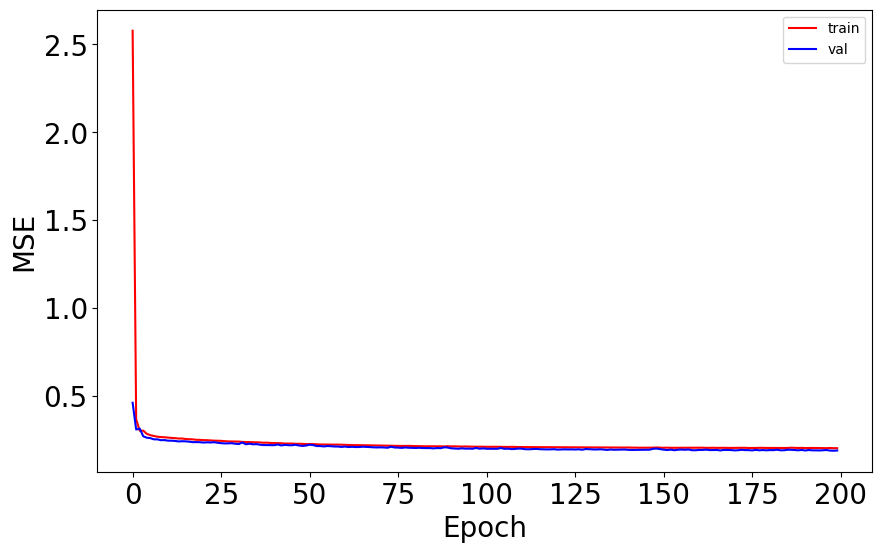

In [70]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [71]:

score = model.evaluate(X_test,y_test)
print('Test mse:', score[1])


57/57 [==============================] - 0s 860us/step - loss: 0.0362 - mse: 0.0362
Test mse: 0.03616674616932869


57/57 [==============================] - 0s 950us/step


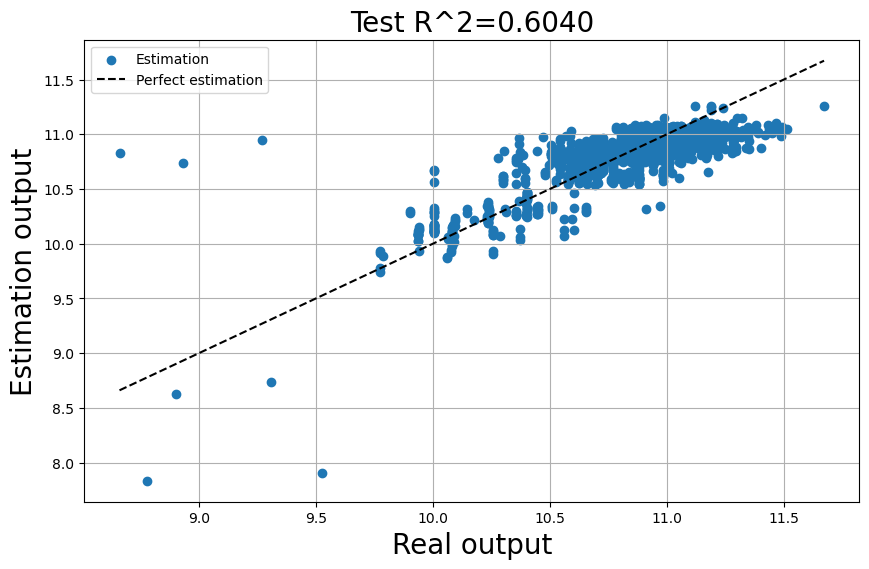

In [72]:

yhat = model.predict(X_test)
R2_score = r2_score(y_test,yhat)
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [73]:
print('R2:', R2_score)

R2: 0.6039598158455012


Apply cross validation

In [74]:
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import cross_val_score

In [75]:

def create_network():
    
    network = Sequential()

    network.add(Dense(5, activation='tanh', input_dim=23, name='input_layer'))

    network.add(Dense(1, activation='linear'))
    
    opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum)
    

    network.compile(loss='mean_squared_error', 
                    optimizer=opt, 
                    metrics=['mse']) 
    
    return network



In [76]:
# Create the Keras model to be used by scikit-learn
neural_network = KerasRegressor(model=create_network, 
                                 epochs=200, 
                                 batch_size=100, 
                                 verbose=0)  


In [77]:
#Evaluate the neural network using 3-fold cross-validation.
print('MSE:', (-cross_val_score(neural_network, X, y, cv=3,  scoring='neg_mean_squared_error')).mean())

MSE: 0.040039338111351665


In [78]:
print('R2:', (cross_val_score(neural_network, X, y, cv=3,  scoring='r2')).mean())

R2: 0.588437033805744


In [79]:
import tensorflow as tf
# Function to create model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_shape=(23,), activation='tanh'))
    model.add(Dense(1, activation='linear'))
    return model

# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)

# create model
model = KerasRegressor(model=create_model, loss='mean_squared_error', optimizer='SGD', epochs=100, batch_size=10, verbose=0)

# define the grid search parameters
learn_rate = [0.1, 0.05, 0.01, 0.001]
momentum = [0.8, 0.6, 0.4,0.2] 
param_grid = dict(optimizer__learning_rate=learn_rate, optimizer__momentum=momentum)


selection_score = make_scorer(r2_score) #r2
#selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=2, scoring=selection_score)
grid_result = grid.fit(X_train, y_train)
print("--- %s seconds ---" % (time.time() - start_time))


--- 2273.5902881622314 seconds ---


In [80]:
# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, stdev, param))

Best: 0.603260 using {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.4}
0.232169 (0.060132) with: {'optimizer__learning_rate': 0.1, 'optimizer__momentum': 0.8}
0.470556 (0.119734) with: {'optimizer__learning_rate': 0.1, 'optimizer__momentum': 0.6}
0.463230 (0.045443) with: {'optimizer__learning_rate': 0.1, 'optimizer__momentum': 0.4}
0.579750 (0.004314) with: {'optimizer__learning_rate': 0.1, 'optimizer__momentum': 0.2}
0.187600 (0.037624) with: {'optimizer__learning_rate': 0.05, 'optimizer__momentum': 0.8}
0.559468 (0.049335) with: {'optimizer__learning_rate': 0.05, 'optimizer__momentum': 0.6}
0.551988 (0.010190) with: {'optimizer__learning_rate': 0.05, 'optimizer__momentum': 0.4}
0.574035 (0.020160) with: {'optimizer__learning_rate': 0.05, 'optimizer__momentum': 0.2}
0.603078 (0.007261) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.8}
0.583664 (0.034188) with: {'optimizer__learning_rate': 0.01, 'optimizer__momentum': 0.6}
0.603260 (0.018919) with: {'op

In [81]:

epochs = 200
learning_rate = 0.01
momentum = 0.6

# Red neuronal
model = Sequential()
model.add(Dense(5,activation='tanh',input_dim=23))
model.add(Dense(1,activation='linear'))

# Optimizer configuration
#gradiente descendente
opt = keras.optimizers.SGD(learning_rate=learning_rate,momentum=momentum,nesterov=True)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mse'])

#adjust model
model_history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

#performance
score = model.evaluate(X_test,y_test)
print('Test loss:', score[0])
print('Test mse:', score[1])

Epoch 1/200
37/37 [==============================] - 0s 4ms/step - loss: 18.9522 - mse: 18.9522 - val_loss: 0.2006 - val_mse: 0.2006
Epoch 2/200
37/37 [==============================] - 0s 2ms/step - loss: 0.1765 - mse: 0.1765 - val_loss: 0.1622 - val_mse: 0.1622
Epoch 3/200
37/37 [==============================] - 0s 2ms/step - loss: 0.1503 - mse: 0.1503 - val_loss: 0.1443 - val_mse: 0.1443
Epoch 4/200
37/37 [==============================] - 0s 2ms/step - loss: 0.1355 - mse: 0.1355 - val_loss: 0.1335 - val_mse: 0.1335
Epoch 5/200
37/37 [==============================] - 0s 3ms/step - loss: 0.1271 - mse: 0.1271 - val_loss: 0.1267 - val_mse: 0.1267
Epoch 6/200
37/37 [==============================] - 0s 3ms/step - loss: 0.1216 - mse: 0.1216 - val_loss: 0.1214 - val_mse: 0.1214
Epoch 7/200
37/37 [==============================] - 0s 3ms/step - loss: 0.1173 - mse: 0.1173 - val_loss: 0.1177 - val_mse: 0.1177
Epoch 8/200
37/37 [==============================] - 0s 2ms/step - loss: 0.1138 -

37/37 [==============================] - 0s 2ms/step - loss: 0.0626 - mse: 0.0626 - val_loss: 0.0610 - val_mse: 0.0610
Epoch 64/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0623 - mse: 0.0623 - val_loss: 0.0603 - val_mse: 0.0603
Epoch 65/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0619 - mse: 0.0619 - val_loss: 0.0600 - val_mse: 0.0600
Epoch 66/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0616 - mse: 0.0616 - val_loss: 0.0595 - val_mse: 0.0595
Epoch 67/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0612 - mse: 0.0612 - val_loss: 0.0593 - val_mse: 0.0593
Epoch 68/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0608 - mse: 0.0608 - val_loss: 0.0587 - val_mse: 0.0587
Epoch 69/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0605 - mse: 0.0605 - val_loss: 0.0584 - val_mse: 0.0584
Epoch 70/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0601 - mse: 0

Epoch 125/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0488 - mse: 0.0488 - val_loss: 0.0450 - val_mse: 0.0450
Epoch 126/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0448 - val_mse: 0.0448
Epoch 127/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0485 - mse: 0.0485 - val_loss: 0.0447 - val_mse: 0.0447
Epoch 128/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0484 - mse: 0.0484 - val_loss: 0.0445 - val_mse: 0.0445
Epoch 129/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 130/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0446 - val_mse: 0.0446
Epoch 131/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0481 - mse: 0.0481 - val_loss: 0.0444 - val_mse: 0.0444
Epoch 132/200
37/37 [==============================] - 0s 2ms/step - 

37/37 [==============================] - 0s 3ms/step - loss: 0.0440 - mse: 0.0440 - val_loss: 0.0390 - val_mse: 0.0390
Epoch 187/200
37/37 [==============================] - 0s 3ms/step - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 188/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0439 - mse: 0.0439 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 189/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0389 - val_mse: 0.0389
Epoch 190/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0392 - val_mse: 0.0392
Epoch 191/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 192/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0437 - mse: 0.0437 - val_loss: 0.0387 - val_mse: 0.0387
Epoch 193/200
37/37 [==============================] - 0s 2ms/step - loss: 0.0436 -

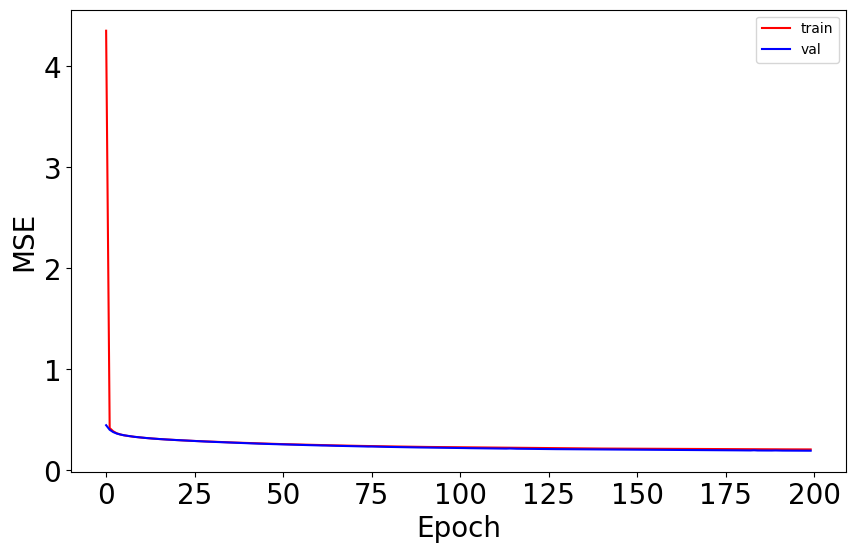

In [82]:
# Graficar el mse
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

57/57 [==============================] - 0s 950us/step


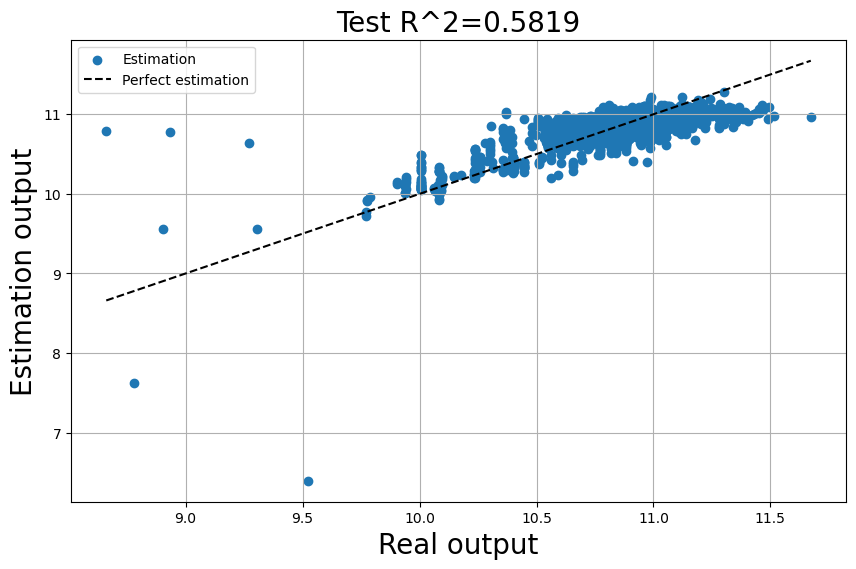

In [83]:
#prediction
yhat = model.predict(X_test)

R2_score = r2_score(y_test,yhat)

xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

new data to predict 

In [85]:

new_data= np.array([[2, 2, 4, 14.2, 32, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]])
new_datd_scaled = scaler.transform(new_data)

# prediction
y_pred_new_data = best_model.predict(new_datd_scaled)

y_pred_new_data_original_scale = np.exp(y_pred_new_data)


print(f"price with this model: {y_pred_new_data_original_scale[0]:f}")


price with this model: 46373.656250


4. Discussion of Results: Based on the results of the comparison and performance of the models, generate a conclusions section discussing the advantages and disadvantages of the proposed models.

| Modelo             | R2           | Predicción     | 
|--------------------|--------------|----------------|
| XGBoosst           | 0.7088       | 57429.80916795 | 
| Random Forest      | 0.6949       | 47514.61449899 | 
| Arbol de desición  | 0.681        | 57429.809168   | 
| Red Neuronal       | 0.6366       | 46373.656250   |


### XGBoost:

R2 Score: 0.7088
Cost Prediction: $57,429.81

Advantages:

Higher R2 Score, indicating a good fit to the data.
The cost prediction is the highest among the models.

Disadvantages:

There may be a risk of overfitting given the high R2 Score.

### Random Forest:

R2 Score: 0.6949
Cost Prediction: $47,514.61

Advantages:

Good R2 Score, indicating good predictive performance.
Lower cost prediction compared to XGBoost.

Disadvantages:

Although good, the R2 Score is slightly lower than XGBoost.

### Decision Tree:

R2 Score: 0.681
Cost Prediction: $57,429.81

Advantages:

Acceptable performance with a decent R2 Score.

Disadvantages:

The cost prediction is the highest, but the overall performance is slightly lower than XGBoost and Random Forest.

### Neural Network:

R2 Score: 0.6366
Cost Prediction: $46373.656250

Advantages:

Although it has the lowest R2 Score, it still shows significant performance.

Disadvantages:

Lower R2 Score compared to other models.

### General Conclusions:

XGBoost appears to be the best model in terms of R2 Score and cost prediction.
Random Forest closely follows XGBoost with good overall performance.
Decision tree and neural network also provide acceptable results, but with certain disadvantages.
It is important to consider the balance between performance and model complexity when selecting the best approach for your specific problem. Additionally, consider the interpretability of the model, as simpler models like decision trees may be easier to understand and explain.